In [1]:
# Instalar Prophet
!pip install prophet --quiet

In [2]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from prophet import Prophet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Cargar los datos
df = pd.read_csv("hotel_bookings.csv", sep=",")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [32]:
# Tamaño del dataframe
print("Filas totales:", len(df))

# ¿Cuántos valores no nulos hay en 'arrival_date_month'?
print("Valores no nulos en 'arrival_date_month':", df['arrival_date_month'].notna().sum())

# ¿Cuántas cancelaciones hay?
print("Valores no nulos en 'is_canceled':", df['is_canceled'].notna().sum())


Filas totales: 119390
Valores no nulos en 'arrival_date_month': 119390
Valores no nulos en 'is_canceled': 119390


In [41]:
# Codificar variables categóricas
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

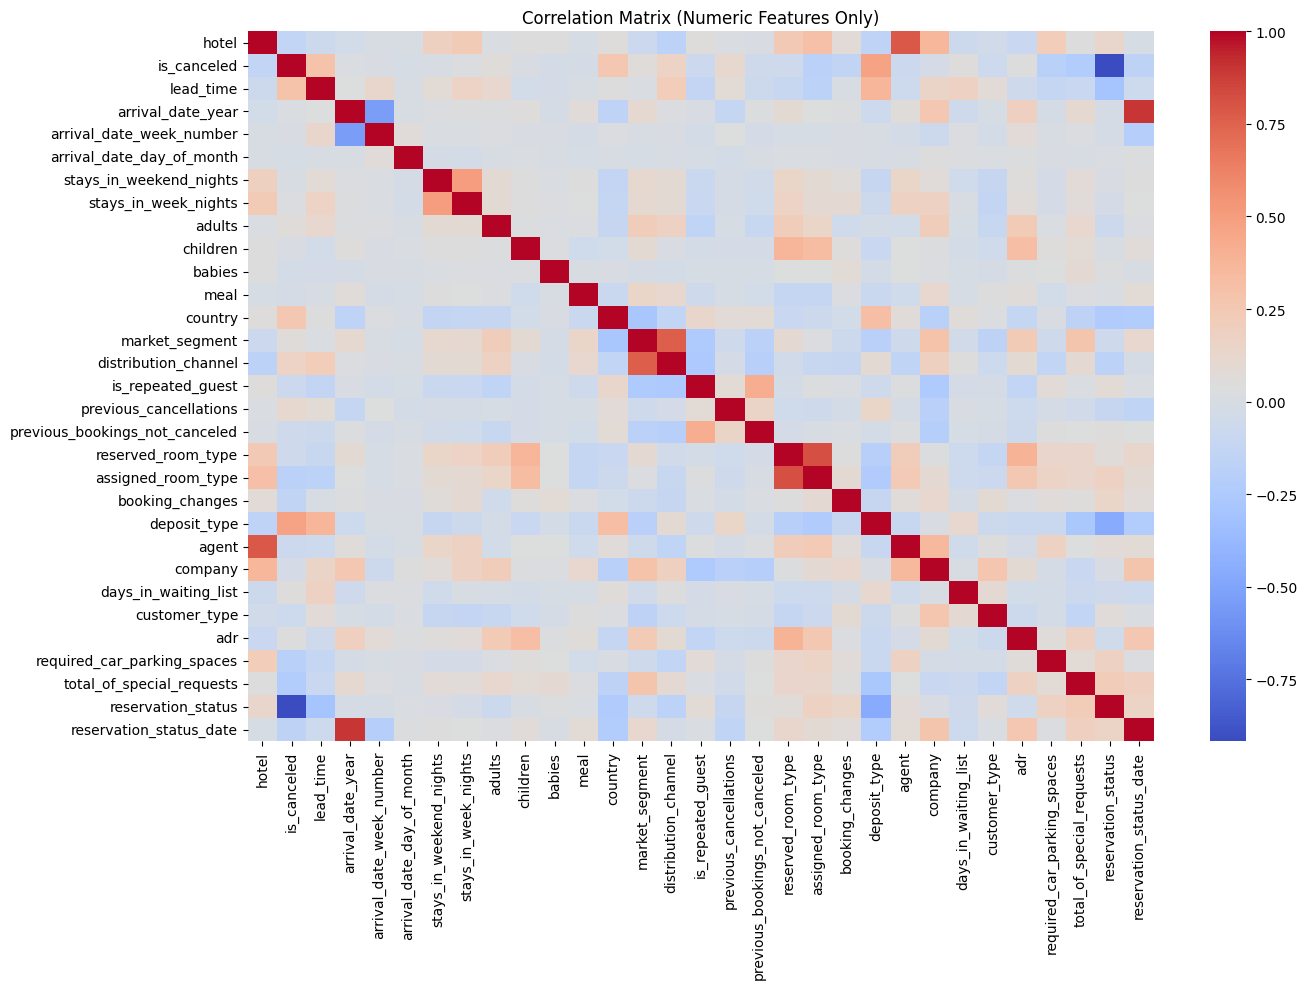

In [42]:
# Visualización de correlaciones
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.tight_layout()
plt.show()

In [48]:
# Entrenamiento de modelo
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

X = pd.get_dummies(X, drop_first=True)

assert X.select_dtypes(include='object').empty, "X contains non-numeric data types!"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9999581204455985
[[14907     0]
 [    1  8970]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



<ipython-input-31-b1f38f4d0b3f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_month', y='is_canceled', data=cancel_rate_by_month, palette='coolwarm')


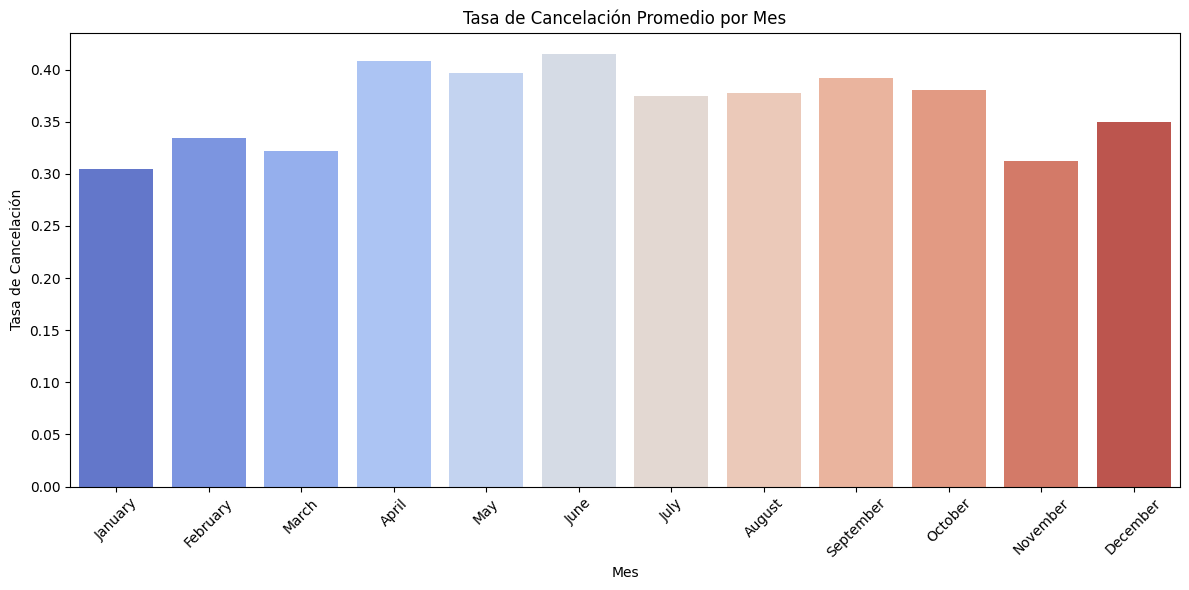

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tasa de cancelacion
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

cancel_rate_by_month = df.groupby('arrival_date_month', observed=True)['is_canceled'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_month', y='is_canceled', data=cancel_rate_by_month, palette='coolwarm')
plt.title('Tasa de Cancelación Promedio por Mes')
plt.ylabel('Tasa de Cancelación')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

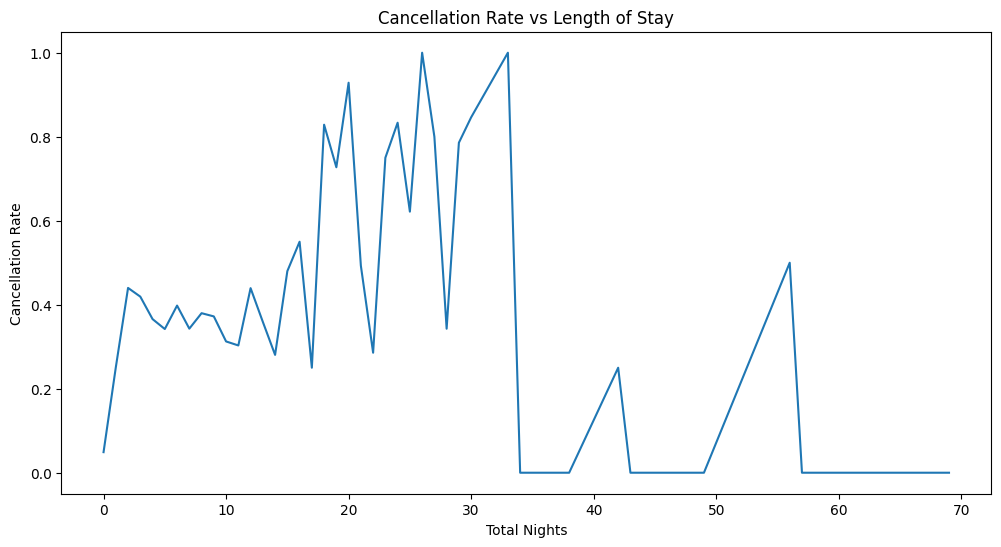

In [49]:
# Duración óptima de la estancia
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
stay_cancel_rate = df.groupby('total_nights')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=stay_cancel_rate, x='total_nights', y='is_canceled')
plt.title("Cancellation Rate vs Length of Stay")
plt.xlabel("Total Nights")
plt.ylabel("Cancellation Rate")
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz6mpya0l/azrn6jfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz6mpya0l/p5clslb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48398', 'data', 'file=/tmp/tmpz6mpya0l/azrn6jfq.json', 'init=/tmp/tmpz6mpya0l/p5clslb0.json', 'output', 'file=/tmp/tmpz6mpya0l/prophet_model82tufdru/prophet_model-20250609053108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


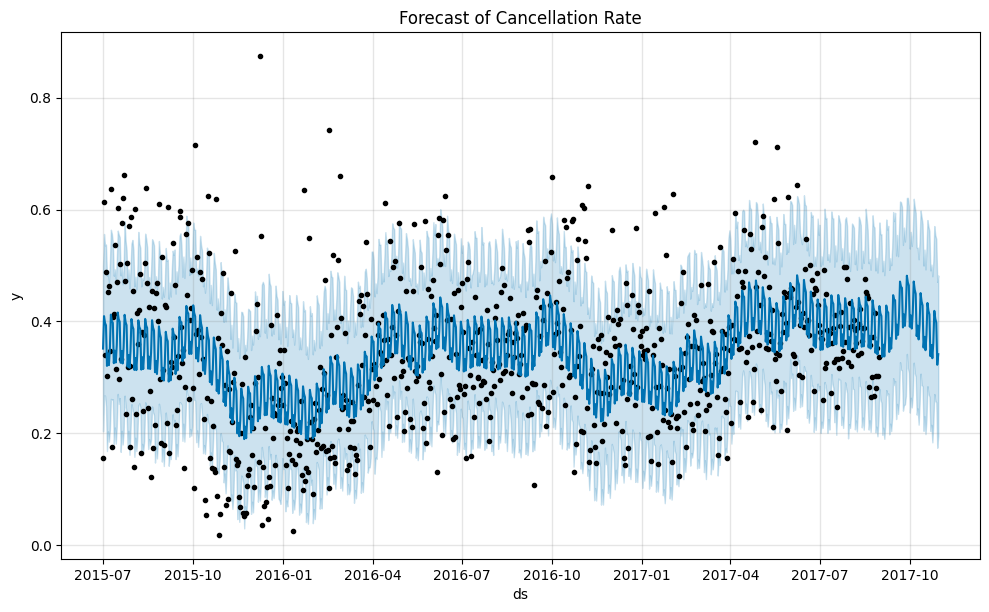

In [50]:
# Análisis de series temporales con Prophet
# Crear columna de fecha
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str), errors='coerce')

cancel_ts = df.groupby('arrival_date')['is_canceled'].mean().reset_index().dropna()
cancel_ts.columns = ['ds', 'y']

m = Prophet()
m.fit(cancel_ts)

future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

fig = m.plot(forecast)
plt.title("Forecast of Cancellation Rate")
plt.show()


<ipython-input-51-31dfd8bb198e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_forecast, x='month', y='yhat', palette='coolwarm')


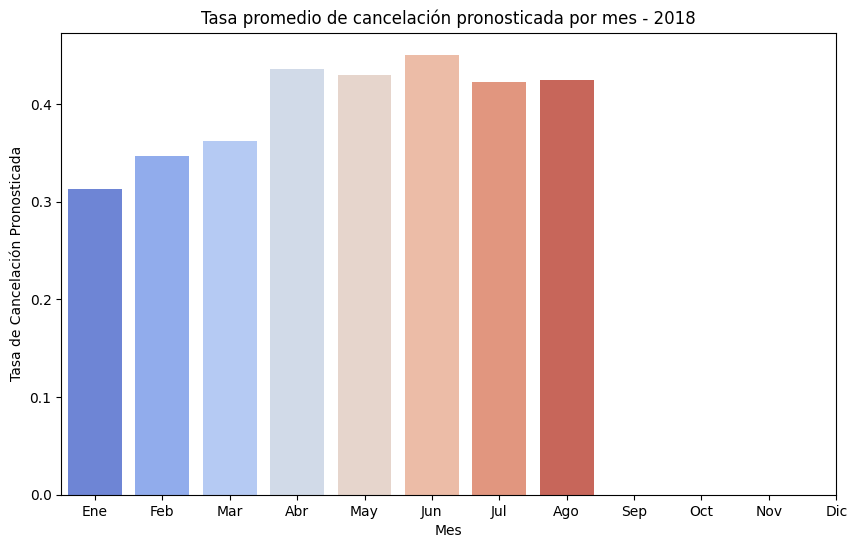

In [51]:
# Series temporales con Prophet del año siguiente al último año del dataset (2018)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

forecast['year'] = forecast['ds'].dt.year
forecast['month'] = forecast['ds'].dt.month

last_data_year = df['arrival_date'].dt.year.max()
forecast_next_year = forecast[forecast['year'] == last_data_year + 1]

monthly_forecast = forecast_next_year.groupby('month')['yhat'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_forecast, x='month', y='yhat', palette='coolwarm')
plt.title(f"Tasa promedio de cancelación pronosticada por mes - {last_data_year + 1}")
plt.xlabel("Mes")
plt.ylabel("Tasa de Cancelación Pronosticada")
plt.xticks(ticks=np.arange(0, 12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.show()
